In [24]:
# Import libraries
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Libraries loaded")


✓ Libraries loaded


In [25]:
# Konfigurasi path dan parameter
INPUT_CSV = "../data/raw/turnbackhoax/metadata/tbh_with_images.csv"
OUTPUT_CSV = "../data/raw/turnbackhoax/metadata/tbh_cleaned.csv"

# Range tanggal Prabowo (20 Oktober 2024 - 20 Oktober 2025)
DATE_START = datetime(2024, 1 , 1)
DATE_END = datetime(2025, 10, 31)

print(f"Input: {INPUT_CSV}")
print(f"Output: {OUTPUT_CSV}")
print(f"Date range: {DATE_START.strftime('%Y-%m-%d')} - {DATE_END.strftime('%Y-%m-%d')}")


Input: ../data/raw/turnbackhoax/metadata/tbh_with_images.csv
Output: ../data/raw/turnbackhoax/metadata/tbh_cleaned.csv
Date range: 2024-01-01 - 2025-10-31


In [26]:
# Load data
print("=" * 80)
print("LOAD DATA")
print("=" * 80)

df = pd.read_csv(INPUT_CSV)
initial_count = len(df)

print(f"\nTotal baris: {initial_count}")
print(f"Kolom: {list(df.columns)}")
print(f"\nShape: {df.shape}")


LOAD DATA

Total baris: 5049
Kolom: ['id', 'source', 'title', 'text', 'date', 'category', 'label', 'image_path', 'url', 'thumbnail_url']

Shape: (5049, 10)


In [27]:
# Info data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5049 non-null   object
 1   source         5049 non-null   object
 2   title          5049 non-null   object
 3   text           5049 non-null   object
 4   date           5049 non-null   object
 5   category       5048 non-null   object
 6   label          5049 non-null   int64 
 7   image_path     5043 non-null   object
 8   url            5049 non-null   object
 9   thumbnail_url  5049 non-null   object
dtypes: int64(1), object(9)
memory usage: 394.6+ KB


In [28]:
df = df.dropna(subset=['category']).reset_index(drop=True)


In [29]:
# Preview 5 baris pertama
df.head()

,id,source,title,text,date,category,label,image_path,url,thumbnail_url
0,TBH_POL_00001,turnbackhoax,[SALAH] Video “Prabowo Temui Mahasiswa saat De...,"Faktanya, pada saat demo 25 Agustus 2025 Presi...",2025-09-02,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00001\ima...,https://turnbackhoax.id/2025/09/02/salah-video...,https://turnbackhoax.id/wp-content/uploads/202...
1,TBH_POL_00002,turnbackhoax,[SALAH] Demo Tuntut Penangkapan Jokowi dan Mak...,"Faktanya, video tersebut merupakan demo penola...",2025-07-31,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00002\ima...,https://turnbackhoax.id/2025/07/31/salah-demo-...,https://turnbackhoax.id/wp-content/uploads/202...
2,TBH_POL_00003,turnbackhoax,[PENIPUAN] Wapres RI Gibran Bagi-Bagi Puluhan ...,Unggahan bukan berasal dari akun resmi bercent...,2024-11-01,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00003\ima...,https://turnbackhoax.id/2024/11/01/penipuan-wa...,https://turnbackhoax.id/wp-content/uploads/202...
3,TBH_POL_00004,turnbackhoax,[SALAH] Suasana Panik saat Presiden Mengeluark...,"Faktanya, video merupakan rapat pemilihan ketu...",2025-09-16,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00004\ima...,https://turnbackhoax.id/2025/09/16/salah-suasa...,https://turnbackhoax.id/wp-content/uploads/202...
4,TBH_POL_00005,turnbackhoax,[SALAH] Pesan WhatsApp Pendaftaran Petugas PPS...,Biro Pemerintahan Setda Provinsi Jakarta telah...,2025-04-29,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00005\ima...,https://turnbackhoax.id/2025/04/29/salah-pesan...,https://turnbackhoax.id/wp-content/uploads/202...


In [30]:
# STEP 1: Hapus duplikat berdasarkan title
print("=" * 80)
print("STEP 1: HAPUS DUPLIKAT")
print("=" * 80)

before = len(df)
df = df.drop_duplicates(subset=['title'], keep='first')
removed = before - len(df)

print(f"Dihapus: {removed} duplikat")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 1: HAPUS DUPLIKAT
Dihapus: 14 duplikat
Tersisa: 5034 baris (99.7%)


In [31]:
# STEP 2: Hapus artikel tanpa gambar
print("=" * 80)
print("STEP 2: HAPUS IMAGE KOSONG")
print("=" * 80)

before = len(df)
df = df[df['image_path'].notna() & (df['image_path'] != '')].copy()
removed = before - len(df)

print(f"Dihapus: {removed} artikel tanpa image")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 2: HAPUS IMAGE KOSONG
Dihapus: 6 artikel tanpa image
Tersisa: 5028 baris (99.6%)


In [32]:
# STEP 3: Hapus [BELUM TERBUKTI]
print("=" * 80)
print("STEP 3: HAPUS [BELUM TERBUKTI]")
print("=" * 80)

before = len(df)
df = df[~df['title'].str.contains(r'\[BELUM TERBUKTI\]', case=False, na=False, regex=True)].copy()
removed = before - len(df)

print(f"Dihapus: {removed} artikel [BELUM TERBUKTI]")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 3: HAPUS [BELUM TERBUKTI]
Dihapus: 40 artikel [BELUM TERBUKTI]
Tersisa: 4988 baris (98.8%)


In [33]:
# STEP 4: Filter tanggal (20 Okt 2024 - 20 Okt 2025)
print("=" * 80)
print("STEP 4: FILTER TANGGAL")
print("=" * 80)

df['date_parsed'] = pd.to_datetime(df['date'], errors='coerce')

print(f"Tanggal awal: {df['date_parsed'].min()}")
print(f"Tanggal akhir: {df['date_parsed'].max()}")

before = len(df)
df = df[(df['date_parsed'] >= DATE_START) & (df['date_parsed'] <= DATE_END)].copy()
removed = before - len(df)

print(f"\nDihapus: {removed} artikel di luar range")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 4: FILTER TANGGAL
Tanggal awal: 2024-01-02 00:00:00
Tanggal akhir: 2025-11-07 00:00:00

Dihapus: 30 artikel di luar range
Tersisa: 4958 baris (98.2%)


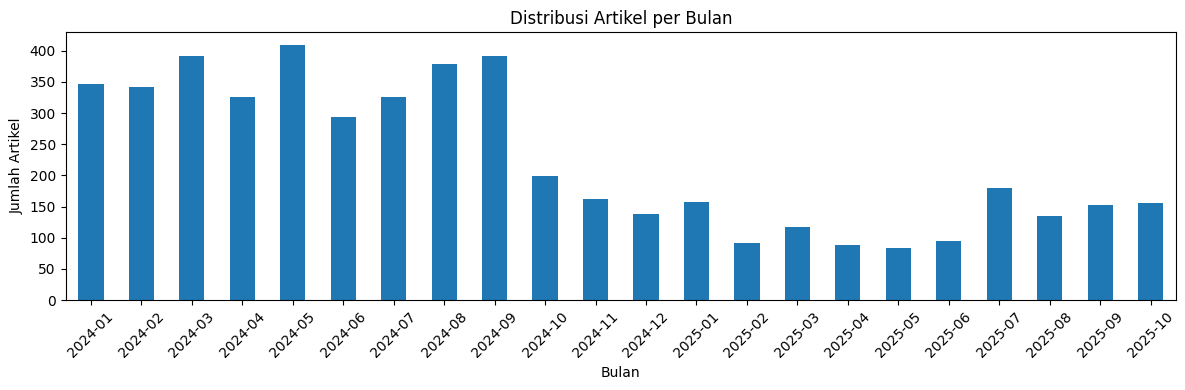

In [34]:
# Visualisasi distribusi per bulan
plt.figure(figsize=(12, 4))
df['date_parsed'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Artikel per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
# STEP 5: Hapus text terlalu pendek (<100 chars)
print("=" * 80)
print("STEP 5: HAPUS TEXT TERLALU PENDEK")
print("=" * 80)

df['text_length'] = df['text'].str.len()

print(f"Text length stats:")
print(df['text_length'].describe())

before = len(df)
df = df[df['text_length'] >= 100].copy()
removed = before - len(df)

print(f"\nDihapus: {removed} artikel text terlalu pendek")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 5: HAPUS TEXT TERLALU PENDEK
Text length stats:
count    4958.000000
mean     1993.238604
std       600.813526
min       690.000000
25%      1595.000000
50%      1873.500000
75%      2256.000000
max      5000.000000
Name: text_length, dtype: float64

Dihapus: 0 artikel text terlalu pendek
Tersisa: 4958 baris (98.2%)


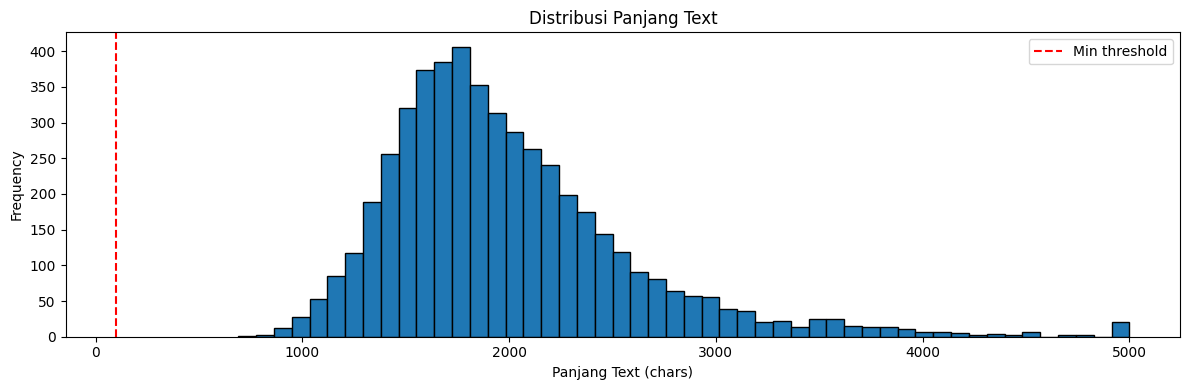

In [36]:
# Visualisasi distribusi panjang text
plt.figure(figsize=(12, 4))
plt.hist(df['text_length'], bins=50, edgecolor='black')
plt.title('Distribusi Panjang Text')
plt.xlabel('Panjang Text (chars)')
plt.ylabel('Frequency')
plt.axvline(x=100, color='r', linestyle='--', label='Min threshold')
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
# Hapus kolom temporary
df = df.drop(columns=['date_parsed', 'text_length', 'title_length', 'image_exists'], errors='ignore')

print("✓ Temporary columns removed")
print(f"Kolom final: {list(df.columns)}")


✓ Temporary columns removed
Kolom final: ['id', 'source', 'title', 'text', 'date', 'category', 'label', 'image_path', 'url', 'thumbnail_url']


In [38]:
# Save ke CSV
df.to_csv(OUTPUT_CSV, index=False, encoding='utf-8')
print(f"✓ Data saved to: {OUTPUT_CSV}")


✓ Data saved to: ../data/raw/turnbackhoax/metadata/tbh_cleaned.csv


In [39]:
# Statistik final
print("=" * 80)
print("STATISTIK FINAL")
print("=" * 80)

print(f"\nTotal awal: {initial_count}")
print(f"Total akhir: {len(df)}")
print(f"Total dihapus: {initial_count - len(df)} ({100*(initial_count - len(df))/initial_count:.1f}%)")
print(f"Retention rate: {100*len(df)/initial_count:.1f}%")

# Label distribution
print(f"\nDistribusi label:")
for label, count in df['label'].value_counts().items():
    print(f"  Label {label}: {count} ({100*count/len(df):.1f}%)")

# Category distribution
if 'category' in df.columns:
    print(f"\nTop 10 kategori:")
    for cat, count in df['category'].value_counts().head(10).items():
        print(f"  - {cat}: {count}")


STATISTIK FINAL

Total awal: 5049
Total akhir: 4958
Total dihapus: 91 (1.8%)
Retention rate: 98.2%

Distribusi label:
  Label 0: 4958 (100.0%)

Top 10 kategori:
  - Fitnah / Hasut / Hoax: 4958


In [40]:
# Date range
dates = pd.to_datetime(df['date'], errors='coerce')
print(f"Date range:")
print(f"  - Awal: {dates.min().strftime('%Y-%m-%d')}")
print(f"  - Akhir: {dates.max().strftime('%Y-%m-%d')}")

# Text stats
text_lengths = df['text'].str.len()
print(f"\nText length stats:")
print(f"  - Min: {text_lengths.min()}")
print(f"  - Max: {text_lengths.max()}")
print(f"  - Mean: {text_lengths.mean():.0f}")
print(f"  - Median: {text_lengths.median():.0f}")


Date range:
  - Awal: 2024-01-02
  - Akhir: 2025-10-31

Text length stats:
  - Min: 690
  - Max: 5000
  - Mean: 1993
  - Median: 1874


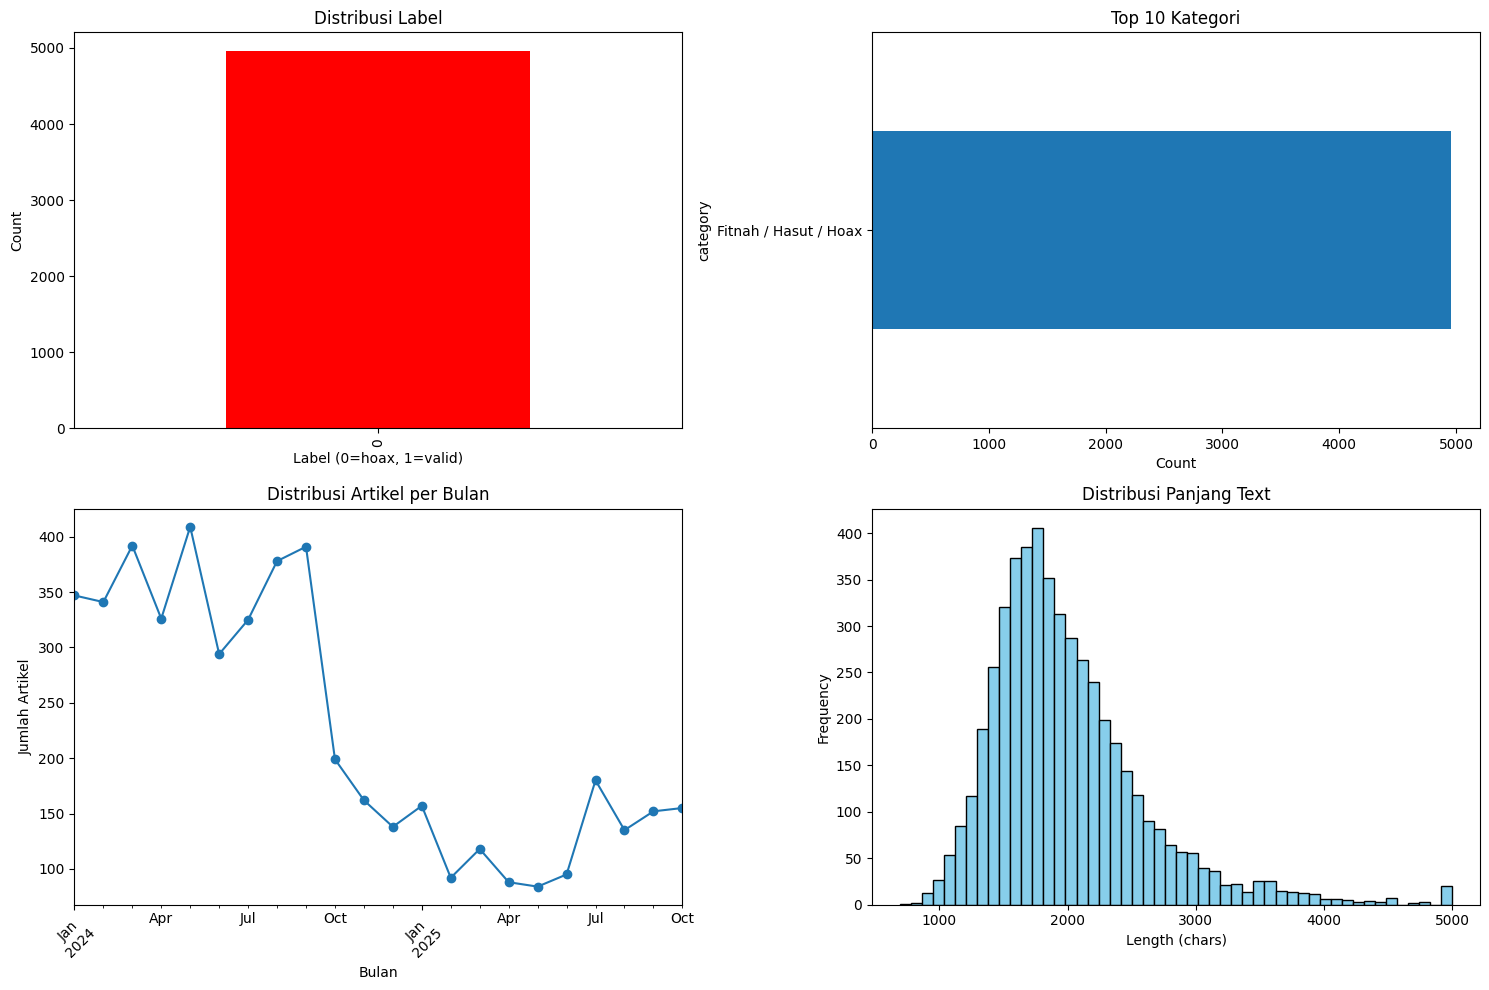

In [41]:
# Visualisasi final
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Label distribution
ax1 = axes[0, 0]
df['label'].value_counts().plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Distribusi Label')
ax1.set_xlabel('Label (0=hoax, 1=valid)')
ax1.set_ylabel('Count')

# 2. Category distribution
ax2 = axes[0, 1]
df['category'].value_counts().head(10).plot(kind='barh', ax=ax2)
ax2.set_title('Top 10 Kategori')
ax2.set_xlabel('Count')

# 3. Date distribution
ax3 = axes[1, 0]
dates = pd.to_datetime(df['date'], errors='coerce')
dates.dt.to_period('M').value_counts().sort_index().plot(kind='line', ax=ax3, marker='o')
ax3.set_title('Distribusi Artikel per Bulan')
ax3.set_xlabel('Bulan')
ax3.set_ylabel('Jumlah Artikel')
ax3.tick_params(axis='x', rotation=45)

# 4. Text length distribution
ax4 = axes[1, 1]
ax4.hist(df['text'].str.len(), bins=50, edgecolor='black', color='skyblue')
ax4.set_title('Distribusi Panjang Text')
ax4.set_xlabel('Length (chars)')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [42]:
# Preview hasil cleaning
df.head(10)

,id,source,title,text,date,category,label,image_path,url,thumbnail_url
0,TBH_POL_00001,turnbackhoax,[SALAH] Video “Prabowo Temui Mahasiswa saat De...,"Faktanya, pada saat demo 25 Agustus 2025 Presi...",2025-09-02,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00001\ima...,https://turnbackhoax.id/2025/09/02/salah-video...,https://turnbackhoax.id/wp-content/uploads/202...
1,TBH_POL_00002,turnbackhoax,[SALAH] Demo Tuntut Penangkapan Jokowi dan Mak...,"Faktanya, video tersebut merupakan demo penola...",2025-07-31,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00002\ima...,https://turnbackhoax.id/2025/07/31/salah-demo-...,https://turnbackhoax.id/wp-content/uploads/202...
2,TBH_POL_00003,turnbackhoax,[PENIPUAN] Wapres RI Gibran Bagi-Bagi Puluhan ...,Unggahan bukan berasal dari akun resmi bercent...,2024-11-01,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00003\ima...,https://turnbackhoax.id/2024/11/01/penipuan-wa...,https://turnbackhoax.id/wp-content/uploads/202...
3,TBH_POL_00004,turnbackhoax,[SALAH] Suasana Panik saat Presiden Mengeluark...,"Faktanya, video merupakan rapat pemilihan ketu...",2025-09-16,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00004\ima...,https://turnbackhoax.id/2025/09/16/salah-suasa...,https://turnbackhoax.id/wp-content/uploads/202...
4,TBH_POL_00005,turnbackhoax,[SALAH] Pesan WhatsApp Pendaftaran Petugas PPS...,Biro Pemerintahan Setda Provinsi Jakarta telah...,2025-04-29,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00005\ima...,https://turnbackhoax.id/2025/04/29/salah-pesan...,https://turnbackhoax.id/wp-content/uploads/202...
5,TBH_POL_00006,turnbackhoax,[SALAH] Puluhan Warga Bersholawat di Gunung La...,Tidak ditemukan informasi atau pemberitaan kre...,2025-05-14,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00006\ima...,https://turnbackhoax.id/2025/05/14/salah-puluh...,https://turnbackhoax.id/wp-content/uploads/202...
6,TBH_POL_00007,turnbackhoax,[SALAH] Dedi Mulyadi Wajibkan Rumah di Jabar D...,Pernyataan resmi hanya menyebutkan pembangunan...,2025-06-18,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00007\ima...,https://turnbackhoax.id/2025/06/18/salah-dedi-...,https://turnbackhoax.id/wp-content/uploads/202...
7,TBH_POL_00008,turnbackhoax,[SALAH] Ketua DPR Puan Maharani Tolak RUU Pera...,Konteks asli foto dalam video adalah momen pid...,2025-03-26,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00008\ima...,https://turnbackhoax.id/2025/03/26/salah-ketua...,https://turnbackhoax.id/wp-content/uploads/202...
8,TBH_POL_00009,turnbackhoax,[PENIPUAN] Tautan Lowongan Kerja di Kantor Pra...,Konteks asli narasi adalah tentang informasi p...,2025-03-07,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00009\ima...,https://turnbackhoax.id/2025/03/07/penipuan-ta...,https://turnbackhoax.id/wp-content/uploads/202...
9,TBH_POL_00010,turnbackhoax,[SALAH] Nadiem Makarim Jadi DPO Kasus Korupsi ...,Kejagung telah membantah informasi mengenai pe...,2025-06-19,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00010\ima...,https://turnbackhoax.id/2025/06/19/salah-nadie...,https://turnbackhoax.id/wp-content/uploads/202...


In [43]:
# Summary
print("=" * 80)
print("SUMMARY")
print("=" * 80)

summary = {
    'Total Awal': initial_count,
    'Total Akhir': len(df),
    'Dihapus': initial_count - len(df),
    'Retention': f"{100*len(df)/initial_count:.1f}%",
    'Artikel dengan Gambar': '100%',
    'Date Range': f"{dates.min().strftime('%Y-%m-%d')} - {dates.max().strftime('%Y-%m-%d')}",
    'Output File': OUTPUT_CSV
}

for key, value in summary.items():
    print(f"{key}: {value}")

print("\n✓ DATASET SIAP UNTUK PSEUDO-LABELING!")


SUMMARY
Total Awal: 5049
Total Akhir: 4958
Dihapus: 91
Retention: 98.2%
Artikel dengan Gambar: 100%
Date Range: 2024-01-02 - 2025-10-31
Output File: ../data/raw/turnbackhoax/metadata/tbh_cleaned.csv

✓ DATASET SIAP UNTUK PSEUDO-LABELING!


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4958 entries, 0 to 5047
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4958 non-null   object
 1   source         4958 non-null   object
 2   title          4958 non-null   object
 3   text           4958 non-null   object
 4   date           4958 non-null   object
 5   category       4958 non-null   object
 6   label          4958 non-null   int64 
 7   image_path     4958 non-null   object
 8   url            4958 non-null   object
 9   thumbnail_url  4958 non-null   object
dtypes: int64(1), object(9)
memory usage: 426.1+ KB
